# Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (4,4)
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.pad_inches"] = 0.1
# plt.rcParams["text.usetex"] = True

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

## Sigmoid functions

In [2]:
def g(a): # shifted
    return (2/(1 + np.exp(-a))) - 1 

def G(a): # unshifted
    return 1/(1 + np.exp(-a))

def g_prime(a):
    return 2 * G(a) * (1 - G(a))

In [3]:
order = 12
N = 30
w_kj = np.random.random(order)

x = np.linspace(0,1,N)
x_vector = np.zeros((len(x), order))

for i in range(len(x)):
    for j in range(order):
        x_vector[i,j] = x[i]**j

## Random points for sine wave

In [4]:
noise = np.random.normal(0,np.sqrt(0.05), N)
output = np.sin(2*np.pi*x)

## Neural net algorithm

In [5]:
def neural_net(X, w_kj, index):
    # output unit
    a_k = np.sum(w_kj * X)
    y_k = g(a_k)
    
    # expected output
    t_k = np.sin(2 * np.pi * X[1])
    
    # error of output units
    delta_k = g_prime(a_k) * (y_k - t_k)

    #error derivatives
    error_kj = delta_k * X
    
    #total sum of squares error
    E_q = ((y_k - t_k)**2) / 2
    
    return E_q, error_kj

In [6]:
counter = 0
e_vals = []

while True:
    E = []
    error_kj = []
    
    index = 0
    for X in x_vector:
        E_q, e_kj = neural_net(X, w_kj, index)
        E.append(E_q)
        error_kj.append(e_kj)
        index += 1
    
    # count epochs
    counter += 1
    e_vals.append(np.sum(E))
    
    # calculating change in weights
    learning_rate = 0.1
    delta_wkj = - learning_rate * np.sum(error_kj, axis = 0)
    
    # change weights
    w_kj += delta_wkj
    
    # minimizing error
    if np.sum(E) < 0.1:
        break

## Convergence

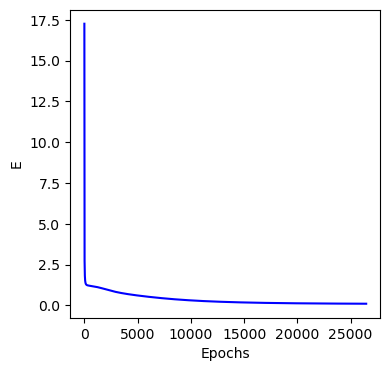

In [7]:
plt.plot(np.arange(counter), e_vals, color = "blue")
plt.xlabel("Epochs")
plt.ylabel("E")
plt.savefig("convergence.png")

In [8]:
test = np.linspace(0,1)
test_vector = np.zeros((len(test),order))

for i in range(len(test)):
    for j in range(order):
        test_vector[i,j] = test[i]**j

In [9]:
test_vals = []

for t in test_vector:
    test_vals.append(g(np.sum(t*w_kj)))

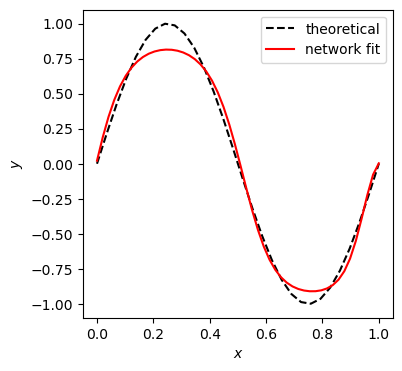

In [10]:
plt.plot(x, np.sin(2*np.pi*x), label = "theoretical" , color = "black", linestyle = "--")
# plt.scatter(x,output,c='black')
plt.plot(test_vector[:,1], test_vals, label = "network fit", color = "red")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.savefig("generated.png")